In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating a dataframe from the csv dataset

df = pd.read_csv("fireSA.csv", index_col=0)
df.columns = ["Year", "Month", "Temperature", "Place", "Number"]
df.head()

,Year,Month,Temperature,Place,Number
0,2002,January,23.78,Spring Valley,1.0
1,2002,February,26.12,Porterville,2.0
2,2002,March,31.56,Winchester,7.0
3,2002,NaN,32.50,NaN,NaN
4,2002,April,36.34,Porterville,5.0


In [3]:
# Handling Null Values

# The csv dataset contains multiple null values or missing values, which can affect the algorithms used to
# analyze the data and the quality of the results following analysis. In this case, the null values in the
# data columns are first displayed to determine their quantity and randomness.

df[(df["Year"].isnull()) | (df["Month"].isnull()) | (df["Temperature"].isnull()) | (df["Place"].isnull()) | (df["Number"].isnull())]

,Year,Month,Temperature,Place,Number
3,2002,NaN,32.5,NaN,NaN
22,2007,NaN,21.0,NaN,NaN
29,2008,NaN,NaN,Porterville,NaN


In [4]:
# Looking at the results, there are three records containing null values and each record has three null values each.
# Since majority of these records' data contain null values and the appearance of null values is random, it is better
# to drop these records from the dataframe. This would eliminate discrepancies in the overall number of data for each
# column and would allow us to easily construct relationships between fields.

df_fire = df.dropna()
df_fire.isnull().sum()

Year           0
Month          0
Temperature    0
Place          0
Number         0
dtype: int64

In [5]:
# If we look at all the records in the current dataframe after handling the null values, the number of entries per year
# are now four for each which makes it equal and each year have an instance of the months January, February, March, and
# April.

df_fire

,Year,Month,Temperature,Place,Number
0,2002,January,23.78,Spring Valley,1.0
1,2002,February,26.12,Porterville,2.0
2,2002,March,31.56,Winchester,7.0
4,2002,April,36.34,Porterville,5.0
5,2003,January,22.09,Winchester,0.0
6,2003,February,26.64,Spring Valley,1.0
7,2003,March,33.81,Spring Valley,3.0
8,2003,April,35.35,Porterville,6.0
9,2004,January,22.89,Winchester,1.0
10,2004,February,27.04,Porterville,1.0


In [6]:
# Establishing statistical data for the numerical fields of the dataset

df_fire.describe()

,Year,Temperature,Number
count,32.000000,32.000000,32.000000
mean,2005.500000,29.877812,3.250000
std,2.327951,4.672712,2.214323
min,2002.000000,22.050000,0.000000
25%,2003.750000,26.075000,1.000000
50%,2005.500000,30.000000,3.000000
75%,2007.250000,33.927500,5.000000
max,2009.000000,36.900000,7.000000


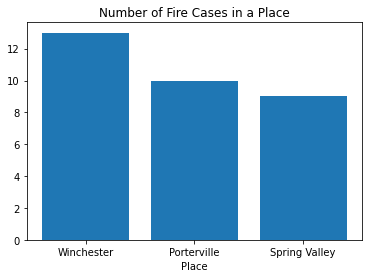

Winchester       13
Porterville      10
Spring Valley     9
Name: Place, dtype: int64


In [7]:
# 1. Which place has the most numerous cases of fire in general?

# The place where the most number of fire cases were recorded is in Winchester. Based on the bar graph below, where the
# instance of all places (Winchester, Porterville, and Spring Valley) are tallied, the case of fires in Winchester totals
# 13 while the other two places, Porterville and Spring Valley, only have 10 and 9 respectively.

places = ["Winchester", "Porterville", "Spring Valley"]
case_per_place = df_fire["Place"].value_counts()

plt.bar(places, case_per_place)
plt.title("Number of Fire Cases in a Place")
plt.xlabel("Place")
plt.show()

print(case_per_place)

In [8]:
# 2. What is the average temperature in Winchester when number of cases is higher than 2?

# On the records where Winchester has more than 2 cases of fire, the average temperature is 32.83 degrees.

df_fire["Temperature"][(df_fire["Place"] == "Winchester") & (df_fire['Number'] > 2)].mean()

32.83444444444445

In [9]:
# 3. What is the maximum temperature during January?

# The maximum temperature recorded on the month of January over the years is 25.94 degrees. Despite the fact that
# this is the highest temperature recorded on the month, the number of fire cases on this record is one of the lowest.

temp_df = df_fire[df_fire["Month"] == "January"]
temp_df[temp_df["Temperature"] == temp_df["Temperature"].max()]

,Year,Month,Temperature,Place,Number
21,2007,January,25.94,Porterville,1.0


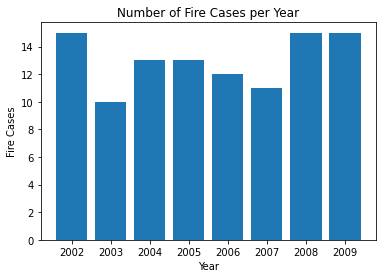

{2002: 15.0, 2003: 10.0, 2004: 13.0, 2005: 13.0, 2006: 12.0, 2007: 11.0, 2008: 15.0, 2009: 15.0}


In [10]:
# 4. Which year/s has/have the most number of cases?

# To determine which year/s has/have the most number of cases, I created a dictionary to store the years as keys and
# the sum of its respective cases as the value. After creating and assigning the values to the dictionary, a bar graph
# was used to visualize the total number of cases per year. From this graph, we can see that the years 2002, 2008, and
# 2009 have the most number of fire cases which is 15. 

cases_per_year = {}

for i in range(8) :
    cases_per_year[2002 + i] = df_fire["Number"][df_fire["Year"] == 2002 + i].sum()

years = list(cases_per_year.keys())
cases = list(cases_per_year.values())

plt.bar(years, cases)
plt.title("Number of Fire Cases per Year")
plt.xlabel("Year")
plt.ylabel("Fire Cases")
plt.show()

print(cases_per_year)

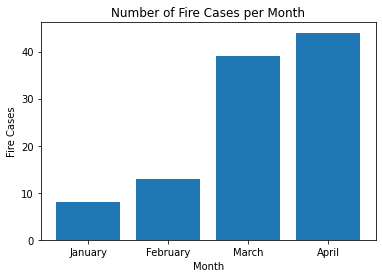

{'January': 8.0, 'February': 13.0, 'March': 39.0, 'April': 44.0}


In [11]:
# 5. Which month has the least number of cases?

# In order to get the number of cases per month, I used the same method as above when getting the number of cases per
# year. In this case, the month with the least number of cases is January since it only has a total of 8 fire cases
# while the month with the most number of cases is April, having a total of 44 cases. Looking at the graph, the number
# of cases shot up significantly in March compared to February. This must be the reason why March is considered the
# Fire Prevention Month since it is the ideal month to start preparing for the cases of fire.

months = ["January", "February", "March", "April"]
cases_per_month = {}

for month in months :
    cases_per_month[month] = df_fire["Number"][df_fire["Month"] == month].sum()

cases = list(cases_per_month.values())

plt.bar(months, cases)
plt.title("Number of Fire Cases per Month")
plt.xlabel("Month")
plt.ylabel("Fire Cases")
plt.show()

print(cases_per_month)

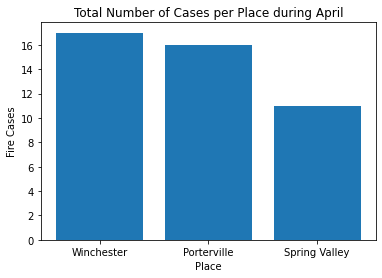

{'Winchester': 17.0, 'Porterville': 16.0, 'Spring Valley': 11.0}


,Year,Month,Temperature,Place,Number
4,2002,April,36.34,Porterville,5.0
8,2003,April,35.35,Porterville,6.0
12,2004,April,36.24,Winchester,7.0
16,2005,April,36.57,Porterville,5.0
20,2006,April,34.28,Spring Valley,5.0
25,2007,April,36.90,Winchester,5.0
30,2008,April,34.68,Spring Valley,6.0
34,2009,April,34.67,Winchester,5.0


In [12]:
# 6. Which place has the greatest number of cases during April?

# The place with the greatest number of cases during April is Winchester since it has a total of 17 cases. This can
# be derived by adding the records of April 2004, 2007, and 2009

df_april = df_fire[df_fire["Month"] == "April"]
april_place_dict = {}

for place in places :
    april_place_dict[place] = df_april["Number"][df_fire["Place"] == place].sum()

cases = list(april_place_dict.values())

plt.bar(places, cases)
plt.title("Total Number of Cases per Place during April")
plt.xlabel("Place")
plt.ylabel("Fire Cases")
plt.show()

print(april_place_dict)
df_fire[df_fire["Month"] == "April"]


In [13]:
# 7. What is the least temperature during February of 2002 to 2004?

# During February of 2002 to 2004, the lowest temperature was recorded at 26.12 degrees. Since the resulting
# temperature is below the average, the number of fire cases is also low.

temp_df = df_fire[(df_fire["Year"] >= 2002) & (df_fire["Year"] <= 2004) & (df_fire["Month"] == "February")]
temp_df[temp_df["Temperature"] == temp_df["Temperature"].min()]


,Year,Month,Temperature,Place,Number
1,2002,February,26.12,Porterville,2.0


In [14]:
# 8. Which place has the least temperature from 2008 to 2009?

# From 2008 to 2009, the place with the least temperature was Porterville with a temperature of 24.53 degrees.
# Given that it has one of the lowest recorded temperatures, the number of cases on this record is also small.

temp_df = df_fire[(df_fire["Year"] >= 2008) & (df_fire["Year"] <= 2009)]
temp_df[temp_df["Temperature"] == temp_df["Temperature"].min()]

,Year,Month,Temperature,Place,Number
31,2009,January,24.53,Porterville,1.0


In [15]:
# 9. What is the highest temperature from 2003 to 2007?

# The highest temperature recorded from 2003 to 2007 was 36.9 degrees. This is also the overall highest recorded 
# temperature in the dataset as seen in the next code cell.

temp_df = df_fire[(df_fire["Year"] >= 2003) & (df_fire["Year"] <= 2007)]
temp_df[temp_df["Temperature"] == temp_df["Temperature"].max()]

,Year,Month,Temperature,Place,Number
25,2007,April,36.9,Winchester,5.0


In [16]:
df_fire[df_fire["Temperature"] == df_fire["Temperature"].max()]

,Year,Month,Temperature,Place,Number
25,2007,April,36.9,Winchester,5.0


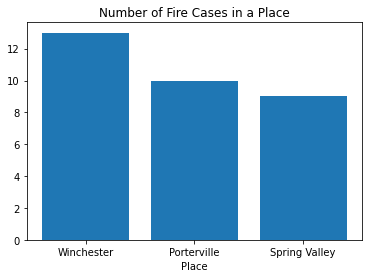

Winchester       13
Porterville      10
Spring Valley     9
Name: Place, dtype: int64


In [21]:
# 10. Which place has the least case of fire?

# The place with the least number of fire cases, based on the bar graph below, is Spring Valley with a total of 9 
# cases. 

plt.bar(places, case_per_place)
plt.title("Number of Fire Cases in a Place")
plt.xlabel("Place")
plt.show()

print(case_per_place)

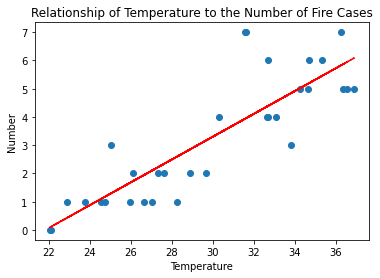

In [18]:
# Conclusion

# To further understand the dataset, we can start by looking at the relationship between the temperature of a month 
# and the number of fire cases. Based on the resulting graph, we can see that there is a positive correlation 
# between the temperature and the number of cases. For instance, one of the lowest temperature occured on
# January 2005 which is 22.05 degrees and there were no case of fire recorded. However, on March 2002, April 2004, 
# and March 2009, the temperature was all over 30 degrees and each has a number of 7 fire cases.

x = df_fire["Temperature"]
y = df_fire["Number"]

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("Relationship of Temperature to the Number of Fire Cases")
plt.xlabel("Temperature")
plt.ylabel("Number")
plt.show()

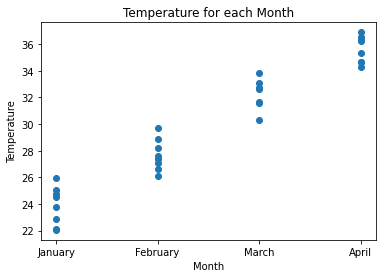

In [19]:
# We could also take a look at the the relationship between the months and the temperature. From the graph, we 
# can observe that temperature rises from January to April. This explains why March is called the Fire Prevention 
# Month. March is the perfect month to discuss and raise awareness about fires as it signifies the start of the 
# summer season where temperature begins to rise.

x = df_fire["Month"]
y = df_fire["Temperature"]

plt.scatter(x, y)

plt.title("Temperature for each Month")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

In [20]:
# Essentially, the number of fire cases would increase as temperature increases and the temperature 
# usually rises during the summer season. For this reason, it is critical to keep track of the 
# months as they pass in order to be aware of the rise in temperature and make necessary precautions 
# to avoid a fire.